In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""

This script makes the dye dispersal plots for figure 2 of the manuscript
(ie. dye dispersal and averaged vel profiles for the 3 different runs)

Created on Wed Mar 13 10:05:25 2019

@author: jacob
"""
import h5py
import scipy.io as spio
import matplotlib.pyplot as plt
import numpy as np
#from cmocean import cm as cmo
import scipy.integrate as integrate 
import matplotlib.ticker 
import cmocean as cmo
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 14
plt.rcParams['contour.negative_linestyle'] = 'solid'
#matplotlib.rcParams.update({'font.size': 22})

Keys: <KeysViewHDF5 ['Bo', 'ans', 'b', 'bp', 'dbdx', 'dye1', 'filename', 'nofront', 'nt', 'nx', 'nz', 'path', 'q', 'q_h', 'q_z', 'qv', 't', 'tt', 'tx', 'ty', 'u', 'ua', 'uflux', 'uflux1', 'uv', 'uw', 'va', 'vw', 'w', 'wa', 'wflux', 'wflux1', 'x', 'z']>
Keys: <KeysViewHDF5 ['B2temp', 'Bo', 'b', 'bp', 'dbdx', 'dye1', 'dye2', 'filename', 'nofront', 'nt', 'nx', 'nz', 'path', 'q', 'q_h', 'q_z', 'qv', 't', 'tx', 'ty', 'u', 'ua', 'uflux1', 'uflux2', 'uv', 'uw', 'va', 'vw', 'w', 'wa', 'wflux1', 'wflux2', 'x', 'z']>
Keys: <KeysViewHDF5 ['B2temp', 'Bo', 'b', 'bp', 'dbdx', 'dye1', 'dye2', 'filename', 'nofront', 'nt', 'nx', 'nz', 'path', 'q', 'q_h', 'q_z', 'qv', 't', 'tt', 'tx', 'ty', 'u', 'ua', 'uflux', 'uflux1', 'uflux2', 'uv', 'uw', 'va', 'vw', 'w', 'wa', 'wflux', 'wflux1', 'wflux2', 'x', 'z']>


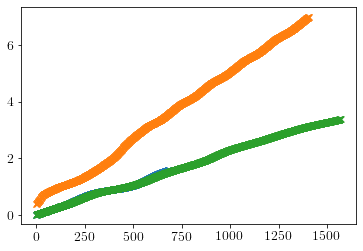

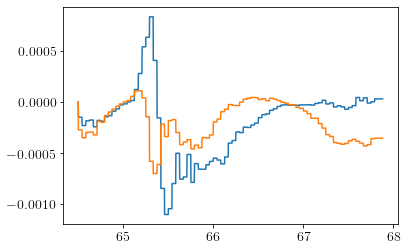

In [6]:
#%% LOAD DATA

filename = '/data/pacific/jacob/LATMIXDYE/LATMIX/run10k.mat' # Front run
f = h5py.File(filename, 'r')

# List all groups
print("Keys: %s" % f.keys())
keys = list(f.keys())[:]

u_f = f['u']
va_f = f['va']

dye1_f = f['dye1']
time_f = f['t'][:,0]
b_f = f['b'] # total buoyancy
x = f['x'][:,0]
z = f['z'][:,0]
nt, nz, nx = u_f.shape

filename = '/data/pacific/jacob/LATMIXDYE/nofront.mat' # No Front
f = h5py.File(filename, 'r')

xnf = f['x'][:,0]

# List all groups
print("Keys: %s" % f.keys())
keys = list(f.keys())[:]

u_nf = f['u']
va_nf = f['va']

ntnf, nznf, nxnf = u_nf.shape
dye1_nf = f['dye1']
time_nf = f['t'][:,0]
b_nf = f['b'] # total buoyancy

filename = '/data/pacific/jacob/LATMIXDYE/notw.mat' # No Front
f = h5py.File(filename, 'r')

# List all groups
print("Keys: %s" % f.keys())
keys = list(f.keys())[:]

u_ntw = f['u']
va_ntw = f['va']

dye1_ntw = f['dye1']
time_ntw = f['t'][:,0]
b_ntw = f['b'] # total buoyancy

tx = f['tx']
ty = f['ty']
# SIM PARAMETERS, FIND THESE IN readmean.m
f = 9.3e-5
dbdx = -5e-7
Vgz = dbdx/f
Vg = (z[1:]-z[1])*Vgz
#%% PLOT TIME STEPS FOR the 3 runs
plt.figure()
plt.plot(time_f/86400, marker='x')
plt.plot(time_nf/86400, marker='x')
plt.plot(time_ntw/86400, marker='x')

#%%
plt.figure()
plt.plot(time_ntw/86400+64.5, tx)
plt.plot(time_ntw/86400+64.5, ty)

1


/homes/metofac/wenegrat/miniconda3/envs/latmix/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10
/homes/metofac/wenegrat/miniconda3/envs/latmix/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in log10


2


/homes/metofac/wenegrat/miniconda3/envs/latmix/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in log10


3


/homes/metofac/wenegrat/miniconda3/envs/latmix/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in log10
/homes/metofac/wenegrat/miniconda3/envs/latmix/lib/python3.6/site-packages/ipykernel_launcher.py:131: RuntimeWarning: divide by zero encountered in log10
/homes/metofac/wenegrat/miniconda3/envs/latmix/lib/python3.6/site-packages/ipykernel_launcher.py:131: RuntimeWarning: invalid value encountered in log10
/homes/metofac/wenegrat/miniconda3/envs/latmix/lib/python3.6/site-packages/ipykernel_launcher.py:131: RuntimeWarning: invalid value encountered in log10
/homes/metofac/wenegrat/miniconda3/envs/latmix/lib/python3.6/site-packages/ipykernel_launcher.py:131: RuntimeWarning: invalid value encountered in log10


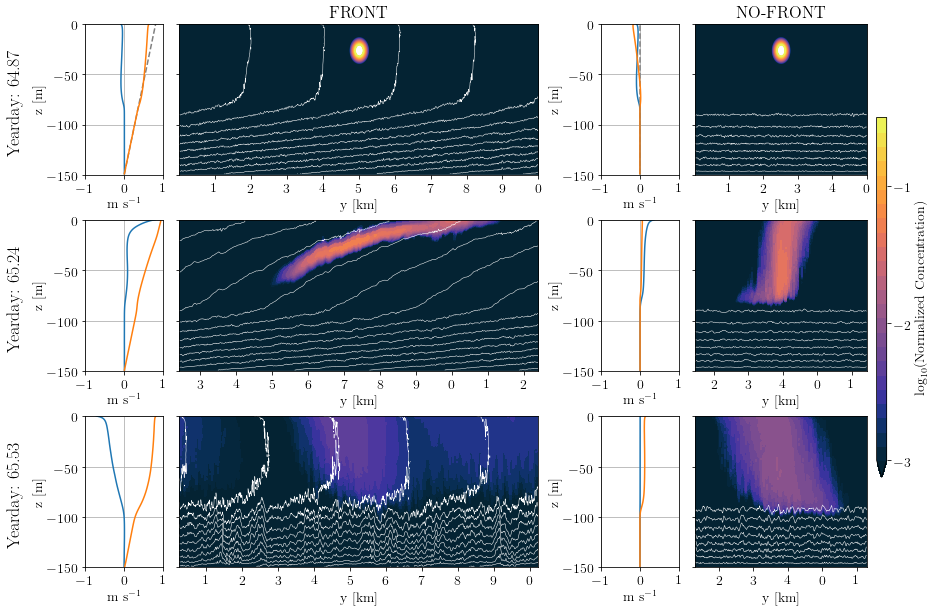

In [10]:
#%% Make Panel Plot UPDATED FORMATTING 2 PANEL COLUMNS
####################################################################################
time1 = 0.37*86400
time2 = 0.7*86400
time3 = 1.02*86400

#time1 = (65.14-64.5)*86400
time2 = (65.24 - 64.5)*86400
time3 = (65.53-64.5)*86400
#time3 = (65.43-64.5)*86400
#time3 = 1*86400
fig = plt.figure(figsize=(14, 10))


conts = np.linspace(-3, 0, 13)
conts = np.linspace(-3, 0, 25)
conts = np.linspace(-3, -0.5, 25)

bconts = np.linspace(-0.005, 0.02, 25)
btemp = b_f[162,74,1280] # buoyancy at center of initial dye patch
bind = np.argmin(np.abs(bconts-btemp))
bconts = bconts + (bconts[bind] - btemp)# + 0.5*(bconts[1]-bconts[0])
cmap = 'plasma'
cmap = 'inferno'
#cmap = cmo.thermal
cmap = 'gnuplot'
cmap = cmo.cm.thermal
#cmap = cmocean.tools.crop_by_percent(cmap, 20, which='min', N=None)
# Front
##################################################
subplotdict = dict()
subplotdict['prf1f'] = plt.subplot2grid((3,34), (0,0), colspan=4)
subplotdict['dye1f'] = plt.subplot2grid((3,34), (0,4), colspan=16)
subplotdict['prf2f'] = plt.subplot2grid((3,34), (1,0), colspan=4)
subplotdict['dye2f'] = plt.subplot2grid((3,34), (1,4), colspan=16)
subplotdict['prf3f'] = plt.subplot2grid((3,34), (2,0), colspan=4)
subplotdict['dye3f'] = plt.subplot2grid((3,34), (2,4), colspan=16)
#### Timesteps ########

# Add geo vels to initial vel profiles
subplotdict[f'prf1f'].plot(-Vg, z[1:], linestyle='dashed', color='0.5')

rotations = [0, 0, 3., 0]
for i in range(1, 4):
    print(i)
    ind = np.argmin(np.abs(time_f-eval(f'time{i}')))
    subplotdict[f'prf{i}f'].plot(np.mean(u_f[ind,:-1,:], axis=-1), z[1:])
    subplotdict[f'prf{i}f'].plot(-(va_f[ind,:-1]+Vg), z[1:])

    # MAKE PLOTS
    rotate = np.argmax(integrate.trapz(dye1_f[ind,1:,:], x=z[1:], axis=0)) -int(nx/2)
    #rotate  = np.argmin(np.abs(x/1e3 - rotations[i]))
    
    dyevar = np.log10(np.roll(dye1_f[ind,1:,:], -rotate, axis=-1))
    dyevar[np.isnan(dyevar)] = -10
    dyevar[~np.isfinite(dyevar)] = -10
    
    bvar = b_f[ind,:-1,:] - dbdx*x
    bvar = np.roll(bvar, -rotate, axis=-1)
    bvar = bvar + dbdx*x
    xr = np.roll(x/1e3, -rotate, axis=0)
    xr[0:np.argmin(xr/1e3)] = xr[0:np.argmin(xr/1e3)]-10
    

    im = subplotdict[f'dye{i}f'].contourf(xr, z[1:], dyevar, conts, extend='min', cmap = cmap)
    temp = subplotdict[f'dye{i}f'].contour(xr, z[1:], bvar, bconts, colors='w',  linewidths=0.5)
#    subplotdict[f'dye{i}f'].clabel(temp, fmt='%1.5f')
    for c in im.collections:
        c.set_edgecolor("face")
    # Formatting stuff
    subplotdict[f'dye{i}f'].set_xlabel('y [km]')
    subplotdict[f'dye{i}f'].set_yticklabels([])
    subplotdict[f'prf{i}f'].set_xlim((-1, 1))
    subplotdict[f'prf{i}f'].set_xlabel('m s$^{-1}$')
    subplotdict[f'prf{i}f'].set_ylim((-150, 0))

    subplotdict[f'prf{i}f'].set_ylabel('z [m]')
#    subplotdict[f'prf{i}f'].set_ylabel('z [m]', rotation=0)
    subplotdict[f'dye{i}f'].set_ylim((-150, 0))
    subplotdict[f'prf{i}f'].yaxis.set_label_coords(-0.5, 0.5) #coordinates in plot coordinates (0-1)
    subplotdict[f'prf{i}f'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}f'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}f'].set_xticks([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3,4, 5, 6, 7, 8, 9, 10])
    subplotdict[f'dye{i}f'].set_xlim((np.min(xr), np.max(xr)))

    form = lambda x,pos: str(np.mod(x, 10))
#    def formp(x, pos):
#        out = x+5
#        return out
#    def formm(x, pos):
#        out = x-5
#        return out
#    if i>1:
#        subplotdict[f'dye{i}f'].xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(formp))
#    else:
#        subplotdict[f'dye{i}f'].xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(formm))
    subplotdict[f'dye{i}f'].xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(form))    
    subplotdict[f'prf{i}f'].grid()
    #subplotdict[f'dye{i}f'].set_xticklabels([])
    #subplotdict[f'prf{i}f'].set_xticklabels([])
subplotdict[f'dye1f'].set_title('FRONT')

subplotdict['prf1f'].annotate('Yearday: {:.2f}'.format(eval(f'time{1}')/86400+64.5), xy=(-1., 0.15), xycoords='axes fraction', fontsize=18, rotation=90)
subplotdict['prf2f'].annotate('Yearday: {:.2f}'.format(eval(f'time{2}')/86400+64.5), xy=(-1., 0.15), xycoords='axes fraction', fontsize=18, rotation=90)
subplotdict['prf3f'].annotate('Yearday: {:.2f}'.format(eval(f'time{3}')/86400+64.5), xy=(-1., 0.15), xycoords='axes fraction', fontsize=18, rotation=90)


# NO Front
##################################################

subplotdict['prf1nf'] = plt.subplot2grid((3,34), (0,22), colspan=4)
subplotdict['dye1nf'] = plt.subplot2grid((3,34), (0,26), colspan=8)
subplotdict['prf2nf'] = plt.subplot2grid((3,34), (1,22), colspan=4)
subplotdict['dye2nf'] = plt.subplot2grid((3,34), (1,26), colspan=8)
subplotdict['prf3nf'] = plt.subplot2grid((3,34), (2,22), colspan=4)
subplotdict['dye3nf'] = plt.subplot2grid((3,34), (2,26), colspan=8)
#### Timesteps ########
subplotdict[f'prf1nf'].plot(0*Vg, z[1:], linestyle='dashed', color='0.5')

rotations = [0, 0, 1., 1]
for i in range(1, 4):
    ind = np.argmin(np.abs(time_nf-eval(f'time{i}')))
    subplotdict[f'prf{i}nf'].plot(np.mean(u_nf[ind,:-1,:], axis=-1), z[1:])
    subplotdict[f'prf{i}nf'].plot(-va_nf[ind,:-1], z[1:])

    # MAKE PLOTS
    indf = np.argmin(np.abs(time_nf-eval(f'time{i}')))
    rotate = np.argmax(integrate.trapz(dye1_nf[indf,1:,:], x=z[1:], axis=0)) -int(nxnf/2)
    #rotate  = np.argmin(np.abs(xnf/1e3 - rotations[i]))

    dyevar = np.log10(np.roll(dye1_nf[ind,1:,:], -rotate, axis=-1))
    dyevar[np.isnan(dyevar)] = -10
    dyevar[~np.isfinite(dyevar)] = -10
    
    bvar = b_nf[ind,:-1,:] 
    bvar = np.roll(bvar, -rotate, axis=-1)
    bvar = bvar 
    
    xr = np.roll(xnf/1e3, -rotate, axis=0)
    xr[0:np.argmin(xr/1e3)] = xr[0:np.argmin(xr/1e3)]-5
    
    im = subplotdict[f'dye{i}nf'].contourf(xr, z[1:], dyevar, conts, extend='min', cmap = cmap)
    subplotdict[f'dye{i}nf'].contour(xr, z[1:], bvar,bconts, colors='w',  linewidths=0.5)
    for c in im.collections:
        c.set_edgecolor("face")
    # Formatting stuff
    subplotdict[f'dye{i}nf'].set_xlabel('y [km]')
    subplotdict[f'dye{i}nf'].set_yticklabels([])
    subplotdict[f'prf{i}nf'].set_xlim((-1, 1))
    subplotdict[f'prf{i}nf'].set_xlabel('m s$^{-1}$')
    subplotdict[f'prf{i}nf'].set_ylim((-150, 0))

    subplotdict[f'prf{i}nf'].set_ylabel('z [m]')
    subplotdict[f'dye{i}nf'].set_ylim((-150, 0))
    subplotdict[f'prf{i}nf'].yaxis.set_label_coords(-0.5, 0.5) #coordinates in plot coordinates (0-1)
    subplotdict[f'prf{i}nf'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}nf'].set_yticks([-150, -100, -50, 0])
#    subplotdict[f'dye{i}nf'].set_xticks([0-rotkm, 1-rotkm, 2-rotkm, 3-rotkm,4-rotkm, 5-rotkm])
    subplotdict[f'dye{i}nf'].set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3,4, 5])
    subplotdict[f'dye{i}nf'].set_xlim((np.min(xr), np.max(xr)))

    form = lambda x,pos: str(np.mod(x, 5))
    subplotdict[f'dye{i}nf'].xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(form))
    #subplotdict[f'dye{i}nf'].set_xticklabels([5-rotkm, 5-rotkm+1, 2-rotkm, 3-rotkm,4-rotkm, 5-rotkm])
    subplotdict[f'prf{i}nf'].grid()
#    subplotdict[f'dye{i}nf'].set_title('Day: {:.2f}'.format(eval(f'time{i}')/86400))
#    subplotdict[f'dye{i}nf'].set_xticklabels([])
    #subplotdict[f'prf{i}nf'].set_xticklabels([])
    
#subplotdict['prf1nf'].annotate('NO-FRONT', xy=(-1., 0.75), xycoords='axes fraction', fontsize=18, rotation=90)
subplotdict[f'dye1nf'].set_title('NO-FRONT')
# ADD COLORBAR
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.25, 0.01, 0.5])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_ticks([-3, -2, -1, 0])
cb.set_label('log$_{10}$(Normalized Concentration)')
cb.solids.set_edgecolor("face")
plt.subplots_adjust(wspace=2, hspace=0.3)

plt.savefig('/data/pacific/jacob/LATMIXDYE/NEWFIGS/FigureModelDye10K.pdf', bbox_inches='tight')

AttributeError: module 'cmocean' has no attribute 'plots'

In [ ]:
#%% Make Panel Plot NO-GEOMIX ONLY
####################################################################################
time1 = 0.37*86400
time2 = 0.7*86400
time3 = 1.02*86400

#time1 = (65.14-64.5)*86400
time2 = (65.24 - 64.5)*86400
time3 = (65.53-64.5)*86400
fig = plt.figure(figsize=(8, 10))


conts = np.linspace(-3, 0, 13)

conts = np.linspace(-3, 0, 25)

bconts = np.linspace(-0.005, 0.02, 25)
btemp = b_ntw[162,74,640] # buoyancy at center of initial dye patch
bind = np.argmin(np.abs(bconts-btemp))
bconts = bconts - (bconts[bind] - btemp) + 0.5*(bconts[1]-bconts[0])
cmap = 'plasma'
cmap = 'inferno'
cmap = cmo.thermal
cmap = 'gnuplot'


# NO-GEOMIX
##################################################
subplotdict = dict()
subplotdict['prf1f'] = plt.subplot2grid((3,17), (0,0), colspan=4)
subplotdict['dye1f'] = plt.subplot2grid((3,17), (0,4), colspan=12)
subplotdict['prf2f'] = plt.subplot2grid((3,17), (1,0), colspan=4)
subplotdict['dye2f'] = plt.subplot2grid((3,17), (1,4), colspan=12)
subplotdict['prf3f'] = plt.subplot2grid((3,17), (2,0), colspan=4)
subplotdict['dye3f'] = plt.subplot2grid((3,17), (2,4), colspan=12)
#### Timesteps ########

# Add geo vels to initial vel profiles
subplotdict[f'prf1f'].plot(-Vg, z[1:], linestyle='dashed', color='0.5')

rotations = [0, 0, 0., 1]
for i in range(1, 4):
    ind = np.argmin(np.abs(time_f-eval(f'time{i}')))
    subplotdict[f'prf{i}f'].plot(np.mean(u_ntw[ind,:-1,:], axis=-1), z[1:])
    subplotdict[f'prf{i}f'].plot(-(va_ntw[ind,:-1]+Vg), z[1:])

    # MAKE PLOTS
    rotate = np.argmax(integrate.trapz(dye1_ntw[ind,1:,:], x=z[1:], axis=0)) -int(nxnf/2)
    #rotate  = np.argmin(np.abs(x/1e3 - rotations[i]))
    
    dyevar = np.log10(np.roll(dye1_ntw[ind,1:,:], -rotate, axis=-1))
    dyevar[np.isnan(dyevar)] = -10
    dyevar[~np.isfinite(dyevar)] = -10
    
    bvar = b_ntw[ind,:-1,:] - dbdx*xnf
    bvar = np.roll(bvar, -rotate, axis=-1)
    bvar = bvar + dbdx*xnf
    xr = np.roll(xnf/1e3, -rotate, axis=0)
    xr[0:np.argmin(xr/1e3)] = xr[0:np.argmin(xr/1e3)]-5

    im = subplotdict[f'dye{i}f'].contourf(xr, z[1:], dyevar, conts, extend='min', cmap = cmap)
    subplotdict[f'dye{i}f'].contour(xr, z[1:], bvar, bconts, colors='w',  linewidths=0.5)
    for c in im.collections:
        c.set_edgecolor("face")
    # Formatting stuff
    subplotdict[f'dye{i}f'].set_xlabel('y [km]')
    subplotdict[f'dye{i}f'].set_yticklabels([])
    subplotdict[f'prf{i}f'].set_xlim((-1, 1))
    subplotdict[f'prf{i}f'].set_xlabel('m s$^{-1}$')
    subplotdict[f'prf{i}f'].set_ylim((-150, 0))

    subplotdict[f'prf{i}f'].set_ylabel('z [m]')
#    subplotdict[f'prf{i}f'].set_ylabel('z [m]', rotation=0)
    subplotdict[f'dye{i}f'].set_ylim((-150, 0))
    subplotdict[f'prf{i}f'].yaxis.set_label_coords(-0.5, 0.5) #coordinates in plot coordinates (0-1)
    subplotdict[f'prf{i}f'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}f'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}f'].set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3,4, 5])
    subplotdict[f'dye{i}f'].set_xlim((np.min(xr), np.max(xr)))

    form = lambda x,pos: str(np.mod(x, 5))
    subplotdict[f'dye{i}f'].xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(form))
    subplotdict[f'prf{i}f'].grid()
    #subplotdict[f'dye{i}f'].set_xticklabels([])
    #subplotdict[f'prf{i}f'].set_xticklabels([])
subplotdict[f'dye1f'].set_title('NO-GEOMIX')

subplotdict['prf1f'].annotate('Yearday: {:.2f}'.format(eval(f'time{1}')/86400+64.5), xy=(-1., 0.75), xycoords='axes fraction', fontsize=18, rotation=90)
subplotdict['prf2f'].annotate('Yearday: {:.2f}'.format(eval(f'time{2}')/86400+64.5), xy=(-1., 0.75), xycoords='axes fraction', fontsize=18, rotation=90)
subplotdict['prf3f'].annotate('Yearday: {:.2f}'.format(eval(f'time{3}')/86400+64.5), xy=(-1., 0.75), xycoords='axes fraction', fontsize=18, rotation=90)

# ADD COLORBAR
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.25, 0.01, 0.5])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_ticks([-3, -2, -1, 0])
cb.set_label('log$_{10}$(Normalized Concentration)')
cb.solids.set_edgecolor("face")
plt.subplots_adjust(wspace=2, hspace=0.3)

#plt.savefig('/home/jacob/Dropbox/GulfStreamDye/LATMIXSCIENCE/FigureNOGEODye.pdf', bbox_inches='tight')
#%% Make Panel Plot UPDATED FORMATTING 2 PANEL
####################################################################################
time1 = 0.37*86400
time2 = 0.7*86400
time3 = 1.02*86400
#time3 = 1*86400
fig = plt.figure(figsize=(15, 5))

rotations = [0, 0, 2., 1]
conts = np.linspace(-3, 0, 13)
bconts = np.linspace(-0.003, 0.02, 35)
cmap = 'plasma'
cmap = 'gnuplot'
# Front
##################################################
subplotdict = dict()
subplotdict['prf1f'] = plt.subplot2grid((2,50), (0,0), colspan=4)
subplotdict['dye1f'] = plt.subplot2grid((2,50), (0,4), colspan=12)
subplotdict['prf2f'] = plt.subplot2grid((2,50), (0,17), colspan=4)
subplotdict['dye2f'] = plt.subplot2grid((2,50), (0,21), colspan=12)
subplotdict['prf3f'] = plt.subplot2grid((2,50), (0,34), colspan=4)
subplotdict['dye3f'] = plt.subplot2grid((2,50), (0,38), colspan=12)
#### Timesteps ########

# Add geo vels to initial vel profiles
subplotdict[f'prf1f'].plot(-Vg, z[1:], linestyle='dashed', color='0.5')


for i in range(1, 4):
    ind = np.argmin(np.abs(time_f-eval(f'time{i}')))
    subplotdict[f'prf{i}f'].plot(np.mean(u_f[ind,:-1,:], axis=-1), z[1:])
    subplotdict[f'prf{i}f'].plot(-(va_f[ind,:-1]+Vg), z[1:])

    # MAKE PLOTS
    rotate = np.argmax(integrate.trapz(dye1_f[ind,1:,:], x=z[1:], axis=0)) -int(nx/2)
    rotate  = np.argmin(np.abs(x/1e3 - rotations[i]))
    
    dyevar = np.log10(np.roll(dye1_f[ind,1:,:], -rotate, axis=-1))
    dyevar[np.isnan(dyevar)] = -10
    dyevar[~np.isfinite(dyevar)] = -10
    
    bvar = b_f[ind,:-1,:] - dbdx*x
    bvar = np.roll(bvar, -rotate, axis=-1)
    bvar = bvar + dbdx*x
    xr = np.roll(x/1e3, -rotate, axis=0)
    xr[0:np.argmin(xr/1e3)] = xr[0:np.argmin(xr/1e3)]-5

    im = subplotdict[f'dye{i}f'].contourf(xr, z[1:], dyevar, conts, extend='min', cmap = cmap)
    subplotdict[f'dye{i}f'].contour(xr, z[1:], bvar, bconts, colors='w',  linewidths=0.5)
    for c in im.collections:
        c.set_edgecolor("face")
    # Formatting stuff
#    subplotdict[f'dye{i}f'].set_xlabel('x [km]')
    subplotdict[f'dye{i}f'].set_yticklabels([])
    subplotdict[f'prf{i}f'].set_xlim((-1, 1))
#    subplotdict[f'prf{i}f'].set_xlabel('m s$^{-1}$')
    subplotdict[f'prf{i}f'].set_ylim((-150, 0))
    if i>1:
      subplotdict[f'prf{i}f'].set_yticklabels([])
    else:
        subplotdict[f'prf{i}f'].set_ylabel('z [m]')
#    subplotdict[f'prf{i}f'].set_ylabel('z [m]', rotation=0)
    subplotdict[f'dye{i}f'].set_ylim((-150, 0))
    subplotdict[f'prf{i}f'].yaxis.set_label_coords(-0.5, 0.5) #coordinates in plot coordinates (0-1)
    subplotdict[f'prf{i}f'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}f'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}f'].set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3,4, 5])
    subplotdict[f'dye{i}f'].set_xlim((np.min(xr), np.max(xr)))

#    form = lambda x,pos: str(np.mod(x, 5))
#    subplotdict[f'dye{i}f'].xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(form))
    subplotdict[f'prf{i}f'].grid()
    subplotdict[f'dye{i}f'].set_title('Yearday: {:.2f}'.format(eval(f'time{i}')/86400+64.5))
    subplotdict[f'dye{i}f'].set_xticklabels([])
    subplotdict[f'prf{i}f'].set_xticklabels([])
    
subplotdict['prf1f'].annotate('FRONT', xy=(-1., 0.65), xycoords='axes fraction', fontsize=18, rotation=90)

# NO Front
##################################################
subplotdict['prf1nf'] = plt.subplot2grid((2,50), (1,0), colspan=4)
subplotdict['dye1nf'] = plt.subplot2grid((2,50), (1,4), colspan=12)
subplotdict['prf2nf'] = plt.subplot2grid((2,50), (1,17), colspan=4)
subplotdict['dye2nf'] = plt.subplot2grid((2,50), (1,21), colspan=12)
subplotdict['prf3nf'] = plt.subplot2grid((2,50), (1,34), colspan=4)
subplotdict['dye3nf'] = plt.subplot2grid((2,50), (1,38), colspan=12)
#### Timesteps ########
subplotdict[f'prf1nf'].plot(0*Vg, z[1:], linestyle='dashed', color='0.5')

for i in range(1, 4):
    ind = np.argmin(np.abs(time_nf-eval(f'time{i}')))
    subplotdict[f'prf{i}nf'].plot(np.mean(u_nf[ind,:-1,:], axis=-1), z[1:])
    subplotdict[f'prf{i}nf'].plot(-va_nf[ind,:-1], z[1:])

    # MAKE PLOTS
    indf = np.argmin(np.abs(time_f-eval(f'time{i}')))
    rotate = np.argmax(integrate.trapz(dye1_f[indf,1:,:], x=z[1:], axis=0)) -int(nx/2)
    rotate  = np.argmin(np.abs(x/1e3 - rotations[i]))

    dyevar = np.log10(np.roll(dye1_nf[ind,1:,:], -rotate, axis=-1))
    dyevar[np.isnan(dyevar)] = -10
    dyevar[~np.isfinite(dyevar)] = -10
    
    bvar = b_nf[ind,:-1,:] 
    bvar = np.roll(bvar, -rotate, axis=-1)
    bvar = bvar 
    
    xr = np.roll(x/1e3, -rotate, axis=0)
    xr[0:np.argmin(xr/1e3)] = xr[0:np.argmin(xr/1e3)]-5
    im = subplotdict[f'dye{i}nf'].contourf(xr, z[1:], dyevar, conts, extend='min', cmap = cmap)
    subplotdict[f'dye{i}nf'].contour(xr, z[1:], bvar,bconts, colors='w',  linewidths=0.5)
    for c in im.collections:
        c.set_edgecolor("face")
    # Formatting stuff
    subplotdict[f'dye{i}nf'].set_xlabel('x [km]')
    subplotdict[f'dye{i}nf'].set_yticklabels([])
    subplotdict[f'prf{i}nf'].set_xlim((-1, 1))
    subplotdict[f'prf{i}nf'].set_xlabel('m s$^{-1}$')
    subplotdict[f'prf{i}nf'].set_ylim((-150, 0))
    if i>1:
      subplotdict[f'prf{i}nf'].set_yticklabels([])
    else:
        subplotdict[f'prf{i}nf'].set_ylabel('z [m]')
    subplotdict[f'dye{i}nf'].set_ylim((-150, 0))
    subplotdict[f'prf{i}nf'].yaxis.set_label_coords(-0.5, 0.5) #coordinates in plot coordinates (0-1)
    subplotdict[f'prf{i}nf'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}nf'].set_yticks([-150, -100, -50, 0])
#    subplotdict[f'dye{i}nf'].set_xticks([0-rotkm, 1-rotkm, 2-rotkm, 3-rotkm,4-rotkm, 5-rotkm])
    subplotdict[f'dye{i}nf'].set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3,4, 5])
    subplotdict[f'dye{i}nf'].set_xlim((np.min(xr), np.max(xr)))

    form = lambda x,pos: str(np.mod(x, 5))
    subplotdict[f'dye{i}nf'].xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(form))
    #subplotdict[f'dye{i}nf'].set_xticklabels([5-rotkm, 5-rotkm+1, 2-rotkm, 3-rotkm,4-rotkm, 5-rotkm])
    subplotdict[f'prf{i}nf'].grid()
#    subplotdict[f'dye{i}nf'].set_title('Day: {:.2f}'.format(eval(f'time{i}')/86400))
#    subplotdict[f'dye{i}nf'].set_xticklabels([])
    #subplotdict[f'prf{i}nf'].set_xticklabels([])
    
subplotdict['prf1nf'].annotate('NO-FRONT', xy=(-1., 0.75), xycoords='axes fraction', fontsize=18, rotation=90)

# ADD COLORBAR
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.01, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_ticks([-3, -2, -1, 0])
cb.set_label('log$_{10}$(Concentration)')
cb.solids.set_edgecolor("face")
plt.subplots_adjust(wspace=1.5, hspace=0.1)

#plt.savefig('/home/jacob/Dropbox/GulfStreamDye/LATMIXSCIENCE/FigureModelDye.pdf', bbox_inches='tight')

#%% Make Panel Plot UPDATED FORMATTING 3 PANEL
####################################################################################
time1 = 0.37*86400
time2 = 0.65*86400
time3 = 1.05*86400
fig = plt.figure(figsize=(17, 7))

conts = np.linspace(-3, 0, 20)
bconts = np.linspace(-0.003, 0.02, 35)
cmap = 'plasma'
# Front
##################################################
subplotdict = dict()
subplotdict['prf1f'] = plt.subplot2grid((3,50), (0,0), colspan=4)
subplotdict['dye1f'] = plt.subplot2grid((3,50), (0,4), colspan=12)
subplotdict['prf2f'] = plt.subplot2grid((3,50), (0,17), colspan=4)
subplotdict['dye2f'] = plt.subplot2grid((3,50), (0,21), colspan=12)
subplotdict['prf3f'] = plt.subplot2grid((3,50), (0,34), colspan=4)
subplotdict['dye3f'] = plt.subplot2grid((3,50), (0,38), colspan=12)
#### Timesteps ########

# Add geo vels to initial vel profiles
subplotdict[f'prf1f'].plot(-Vg, z[1:], linestyle='dashed', color='0.5')


for i in range(1, 4):
    ind = np.argmin(np.abs(time_f-eval(f'time{i}')))
    subplotdict[f'prf{i}f'].plot(np.mean(u_f[ind,:-1,:], axis=-1), z[1:])
    subplotdict[f'prf{i}f'].plot(-(va_f[ind,:-1]+Vg), z[1:])

    # MAKE PLOTS
    dyevar = np.log10(dye1_f[ind,1:,:])
    dyevar[np.isnan(dyevar)] = -10
    dyevar[~np.isfinite(dyevar)] = -10
    im = subplotdict[f'dye{i}f'].contourf(x/1e3, z[1:], dyevar, conts, extend='min', cmap = cmap)
    subplotdict[f'dye{i}f'].contour(x/1e3, z[1:], b_f[ind,:-1,:], bconts, colors='w',  linewidths=0.5)
    for c in im.collections:
        c.set_edgecolor("face")
    # Formatting stuff
#    subplotdict[f'dye{i}f'].set_xlabel('x [km]')
    subplotdict[f'dye{i}f'].set_yticklabels([])
    subplotdict[f'prf{i}f'].set_xlim((-1, 1))
#    subplotdict[f'prf{i}f'].set_xlabel('m s$^{-1}$')
    subplotdict[f'prf{i}f'].set_ylim((-150, 0))
    if i>1:
      subplotdict[f'prf{i}f'].set_yticklabels([])
    else:
        subplotdict[f'prf{i}f'].set_ylabel('z [m]')
#    subplotdict[f'prf{i}f'].set_ylabel('z [m]', rotation=0)
    subplotdict[f'dye{i}f'].set_ylim((-150, 0))
    subplotdict[f'prf{i}f'].yaxis.set_label_coords(-0.5, 0.5) #coordinates in plot coordinates (0-1)
    subplotdict[f'prf{i}f'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}f'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}f'].set_xticks([0, 1, 2, 3,4, 5])
    subplotdict[f'prf{i}f'].grid()
    subplotdict[f'dye{i}f'].set_title('Yearday: {:.2f}'.format(eval(f'time{i}')/86400+64.5))
    subplotdict[f'dye{i}f'].set_xticklabels([])
    subplotdict[f'prf{i}f'].set_xticklabels([])
    
subplotdict['prf1f'].annotate('FRONT', xy=(-1., 0.65), xycoords='axes fraction', fontsize=18, rotation=90)

# NO Front
##################################################
subplotdict['prf1nf'] = plt.subplot2grid((3,50), (1,0), colspan=4)
subplotdict['dye1nf'] = plt.subplot2grid((3,50), (1,4), colspan=12)
subplotdict['prf2nf'] = plt.subplot2grid((3,50), (1,17), colspan=4)
subplotdict['dye2nf'] = plt.subplot2grid((3,50), (1,21), colspan=12)
subplotdict['prf3nf'] = plt.subplot2grid((3,50), (1,34), colspan=4)
subplotdict['dye3nf'] = plt.subplot2grid((3,50), (1,38), colspan=12)
#### Timesteps ########
subplotdict[f'prf1nf'].plot(0*Vg, z[1:], linestyle='dashed', color='0.5')

for i in range(1, 4):
    ind = np.argmin(np.abs(time_nf-eval(f'time{i}')))
    subplotdict[f'prf{i}nf'].plot(np.mean(u_nf[ind,:-1,:], axis=-1), z[1:])
    subplotdict[f'prf{i}nf'].plot(-va_nf[ind,:-1], z[1:])

    # MAKE PLOTS
    dyevar = np.log10(dye1_nf[ind,1:,:])
    dyevar[np.isnan(dyevar)] = -10
    dyevar[~np.isfinite(dyevar)] = -10
    im = subplotdict[f'dye{i}nf'].contourf(x/1e3, z[1:], dyevar, conts, extend='min', cmap = cmap)
    subplotdict[f'dye{i}nf'].contour(x/1e3, z[1:], b_nf[ind,:-1,:],bconts, colors='w',  linewidths=0.5)
    for c in im.collections:
        c.set_edgecolor("face")
    # Formatting stuff
#    subplotdict[f'dye{i}nf'].set_xlabel('x [km]')
    subplotdict[f'dye{i}nf'].set_yticklabels([])
    subplotdict[f'prf{i}nf'].set_xlim((-1, 1))
#    subplotdict[f'prf{i}nf'].set_xlabel('m s$^{-1}$')
    subplotdict[f'prf{i}nf'].set_ylim((-150, 0))
    if i>1:
      subplotdict[f'prf{i}nf'].set_yticklabels([])
    else:
        subplotdict[f'prf{i}nf'].set_ylabel('z [m]')
    subplotdict[f'dye{i}nf'].set_ylim((-150, 0))
    subplotdict[f'prf{i}nf'].yaxis.set_label_coords(-0.5, 0.5) #coordinates in plot coordinates (0-1)
    subplotdict[f'prf{i}nf'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}nf'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}nf'].set_xticks([0, 1, 2, 3,4, 5])
    subplotdict[f'prf{i}nf'].grid()
#    subplotdict[f'dye{i}nf'].set_title('Day: {:.2f}'.format(eval(f'time{i}')/86400))
    subplotdict[f'dye{i}nf'].set_xticklabels([])
    subplotdict[f'prf{i}nf'].set_xticklabels([])
    
subplotdict['prf1nf'].annotate('NO-FRONT', xy=(-1., 0.75), xycoords='axes fraction', fontsize=18, rotation=90)

# NO TW
##################################################
subplotdict['prf1ntw'] = plt.subplot2grid((3,50), (2,0), colspan=4)
subplotdict['dye1ntw'] = plt.subplot2grid((3,50), (2,4), colspan=12)
subplotdict['prf2ntw'] = plt.subplot2grid((3,50), (2,17), colspan=4)
subplotdict['dye2ntw'] = plt.subplot2grid((3,50), (2,21), colspan=12)
subplotdict['prf3ntw'] = plt.subplot2grid((3,50), (2,34), colspan=4)
subplotdict['dye3ntw'] = plt.subplot2grid((3,50), (2,38), colspan=12)
#### Timesteps ########
subplotdict[f'prf1ntw'].plot(-Vg, z[1:], linestyle='dashed', color='0.5')

for i in range(1, 4):
    ind = np.argmin(np.abs(time_ntw-eval(f'time{i}')))
    subplotdict[f'prf{i}ntw'].plot(np.mean(u_ntw[ind,:-1,:], axis=-1), z[1:])
    subplotdict[f'prf{i}ntw'].plot(-(va_ntw[ind,:-1]+Vg), z[1:])

    # MAKE PLOTS
    dyevar = np.log10(dye1_ntw[ind,1:,:])
    dyevar[np.isnan(dyevar)] = -10
    dyevar[~np.isfinite(dyevar)] = -10
    im = subplotdict[f'dye{i}ntw'].contourf(x/1e3, z[1:], dyevar, conts, extend='min', cmap = cmap)
    subplotdict[f'dye{i}ntw'].contour(x/1e3, z[1:], b_ntw[ind,:-1,:], bconts, colors='w',  linewidths=0.5)
    for c in im.collections:
        c.set_edgecolor("face")
    
    # Formatting stuff
    subplotdict[f'dye{i}ntw'].set_xlabel('y [km]')
    subplotdict[f'dye{i}ntw'].set_yticklabels([])
    subplotdict[f'prf{i}ntw'].set_xlim((-1, 1))
    subplotdict[f'prf{i}ntw'].set_xlabel('m s$^{-1}$')
    subplotdict[f'prf{i}ntw'].set_ylim((-150, 0))
    if i>1:
      subplotdict[f'prf{i}ntw'].set_yticklabels([])
    else:
        subplotdict[f'prf{i}ntw'].set_ylabel('z [m]')
    subplotdict[f'dye{i}ntw'].set_ylim((-150, 0))
    subplotdict[f'prf{i}ntw'].yaxis.set_label_coords(-0.5,0.5) #coordinates in plot coordinates (0-1)
    subplotdict[f'prf{i}ntw'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}ntw'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}ntw'].set_xticks([0, 1, 2, 3,4, 5])
    subplotdict[f'prf{i}ntw'].grid()
#    subplotdict[f'dye{i}nf'].set_title('Day: {:.2f}'.format(eval(f'time{i}')/86400))

subplotdict['prf1ntw'].annotate('NO-GEOMIX', xy=(-1., 0.85), xycoords='axes fraction', fontsize=18, rotation=90)

# ADD COLORBAR
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.01, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_ticks([-3, -2, -1, 0])
cb.set_label('log$_{10}$(Concentration)')
cb.solids.set_edgecolor("face")
plt.subplots_adjust(wspace=0.5, hspace=0.1)

#plt.savefig('/home/jacob/Dropbox/GulfStreamDye/LATMIXSCIENCE/Figure2.pdf', bbox_inches='tight')
#%% Make Panel Plot _-- OLD
######################################################################################
time1 = 0.37*86400
time2 = 0.65*86400
time3 = 1.05*86400
fig = plt.figure(figsize=(17, 7))

conts = np.linspace(-3, 0, 20)
cmap = 'plasma'
# Front
##################################################
subplotdict = dict()
subplotdict['prf1f'] = plt.subplot2grid((3,26), (0,0), colspan=2)
subplotdict['dye1f'] = plt.subplot2grid((3,26), (0,2), colspan=6)
subplotdict['prf2f'] = plt.subplot2grid((3,26), (0,9), colspan=2)
subplotdict['dye2f'] = plt.subplot2grid((3,26), (0,11), colspan=6)
subplotdict['prf3f'] = plt.subplot2grid((3,26), (0,18), colspan=2)
subplotdict['dye3f'] = plt.subplot2grid((3,26), (0,20), colspan=6)
#### Timesteps ########
for i in range(1, 4):
    ind = np.argmin(np.abs(time_f-eval(f'time{i}')))
    subplotdict[f'prf{i}f'].plot(np.mean(u_f[ind,:-1,:], axis=-1), z[1:])
    subplotdict[f'prf{i}f'].plot(va_f[ind,:-1]+Vg, z[1:])

    # MAKE PLOTS
    dyevar = np.log10(dye1_f[ind,1:,:])
    dyevar[np.isnan(dyevar)] = -10
    dyevar[~np.isfinite(dyevar)] = -10
    subplotdict[f'dye{i}f'].contourf(x/1e3, z[1:], dyevar, conts, extend='min', cmap = cmap)
    subplotdict[f'dye{i}f'].contour(x/1e3, z[1:], b_f[ind,:-1,:], 20, colors='w',  linewidths=0.5)
    
    # Formatting stuff
#    subplotdict[f'dye{i}f'].set_xlabel('x [km]')
    subplotdict[f'dye{i}f'].set_yticklabels([])
    subplotdict[f'prf{i}f'].set_xlim((-1, 1))
#    subplotdict[f'prf{i}f'].set_xlabel('m s$^{-1}$')
    subplotdict[f'prf{i}f'].set_ylim((-150, 0))
#    if i>1:
#      subplotdict[f'prf{i}f'].set_yticklabels([])
#    else:
#        subplotdict[f'prf{i}f'].set_ylabel('z [m]', rotation=0)
    subplotdict[f'prf{i}f'].set_ylabel('z [m]', rotation=0)
    subplotdict[f'dye{i}f'].set_ylim((-150, 0))
    subplotdict[f'prf{i}f'].yaxis.set_label_coords(-0.25,0.45) #coordinates in plot coordinates (0-1)
    subplotdict[f'prf{i}f'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}f'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}f'].set_xticks([0, 1, 2, 3,4, 5])
    subplotdict[f'prf{i}f'].grid()
    subplotdict[f'dye{i}f'].set_title('Day: {:.2f}'.format(eval(f'time{i}')/86400))
    subplotdict[f'dye{i}f'].set_xticklabels([])
    subplotdict[f'prf{i}f'].set_xticklabels([])

# NO Front
##################################################
subplotdict = dict()
subplotdict['prf1nf'] = plt.subplot2grid((3,26), (1,0), colspan=2)
subplotdict['dye1nf'] = plt.subplot2grid((3,26), (1,2), colspan=6)
subplotdict['prf2nf'] = plt.subplot2grid((3,26), (1,9), colspan=2)
subplotdict['dye2nf'] = plt.subplot2grid((3,26), (1,11), colspan=6)
subplotdict['prf3nf'] = plt.subplot2grid((3,26), (1,18), colspan=2)
subplotdict['dye3nf'] = plt.subplot2grid((3,26), (1,20), colspan=6)
#### Timesteps ########
for i in range(1, 4):
    ind = np.argmin(np.abs(time_nf-eval(f'time{i}')))
    subplotdict[f'prf{i}nf'].plot(np.mean(u_nf[ind,:-1,:], axis=-1), z[1:])
    subplotdict[f'prf{i}nf'].plot(va_nf[ind,:-1], z[1:])

    # MAKE PLOTS
    dyevar = np.log10(dye1_nf[ind,1:,:])
    dyevar[np.isnan(dyevar)] = -10
    dyevar[~np.isfinite(dyevar)] = -10
    subplotdict[f'dye{i}nf'].contourf(x/1e3, z[1:], dyevar, conts, extend='min', cmap = cmap)
    subplotdict[f'dye{i}nf'].contour(x/1e3, z[1:], b_nf[ind,:-1,:], 20, colors='w',  linewidths=0.5)
    
    # Formatting stuff
#    subplotdict[f'dye{i}nf'].set_xlabel('x [km]')
    subplotdict[f'dye{i}nf'].set_yticklabels([])
    subplotdict[f'prf{i}nf'].set_xlim((-1, 1))
#    subplotdict[f'prf{i}nf'].set_xlabel('m s$^{-1}$')
    subplotdict[f'prf{i}nf'].set_ylim((-150, 0))
    subplotdict[f'prf{i}nf'].set_ylabel('z [m]', rotation=0)
    subplotdict[f'dye{i}nf'].set_ylim((-150, 0))
    subplotdict[f'prf{i}nf'].yaxis.set_label_coords(-0.25,0.45) #coordinates in plot coordinates (0-1)
    subplotdict[f'prf{i}nf'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}nf'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}nf'].set_xticks([0, 1, 2, 3,4, 5])
    subplotdict[f'prf{i}nf'].grid()
#    subplotdict[f'dye{i}nf'].set_title('Day: {:.2f}'.format(eval(f'time{i}')/86400))
    subplotdict[f'dye{i}nf'].set_xticklabels([])
    subplotdict[f'prf{i}nf'].set_xticklabels([])

# NO TW
##################################################
subplotdict = dict()
subplotdict['prf1ntw'] = plt.subplot2grid((3,26), (2,0), colspan=2)
subplotdict['dye1ntw'] = plt.subplot2grid((3,26), (2,2), colspan=6)
subplotdict['prf2ntw'] = plt.subplot2grid((3,26), (2,9), colspan=2)
subplotdict['dye2ntw'] = plt.subplot2grid((3,26), (2,11), colspan=6)
subplotdict['prf3ntw'] = plt.subplot2grid((3,26), (2,18), colspan=2)
subplotdict['dye3ntw'] = plt.subplot2grid((3,26), (2,20), colspan=6)
#### Timesteps ########
for i in range(1, 4):
    ind = np.argmin(np.abs(time_ntw-eval(f'time{i}')))
    subplotdict[f'prf{i}ntw'].plot(np.mean(u_ntw[ind,:-1,:], axis=-1), z[1:])
    subplotdict[f'prf{i}ntw'].plot(va_ntw[ind,:-1]+Vg, z[1:])

    # MAKE PLOTS
    dyevar = np.log10(dye1_ntw[ind,1:,:])
    dyevar[np.isnan(dyevar)] = -10
    dyevar[~np.isfinite(dyevar)] = -10
    im = subplotdict[f'dye{i}ntw'].contourf(x/1e3, z[1:], dyevar, conts, extend='min', cmap = cmap)
    subplotdict[f'dye{i}ntw'].contour(x/1e3, z[1:], b_ntw[ind,:-1,:], 20, colors='w',  linewidths=0.5)
    
    # Formatting stuff
    subplotdict[f'dye{i}ntw'].set_xlabel('x [km]')
    subplotdict[f'dye{i}ntw'].set_yticklabels([])
    subplotdict[f'prf{i}ntw'].set_xlim((-1, 1))
    subplotdict[f'prf{i}ntw'].set_xlabel('m s$^{-1}$')
    subplotdict[f'prf{i}ntw'].set_ylim((-150, 0))
    subplotdict[f'prf{i}ntw'].set_ylabel('z [m]', rotation=0)
    subplotdict[f'dye{i}ntw'].set_ylim((-150, 0))
    subplotdict[f'prf{i}ntw'].yaxis.set_label_coords(-0.25,0.45) #coordinates in plot coordinates (0-1)
    subplotdict[f'prf{i}ntw'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}ntw'].set_yticks([-150, -100, -50, 0])
    subplotdict[f'dye{i}ntw'].set_xticks([0, 1, 2, 3,4, 5])
    subplotdict[f'prf{i}ntw'].grid()
#    subplotdict[f'dye{i}nf'].set_title('Day: {:.2f}'.format(eval(f'time{i}')/86400))


# ADD COLORBAR
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.01, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_ticks([-3, -2, -1, 0])
cb.set_label('log$_{10}$(Concentration)')

plt.subplots_adjust(wspace=0.2, hspace=0.1)